Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

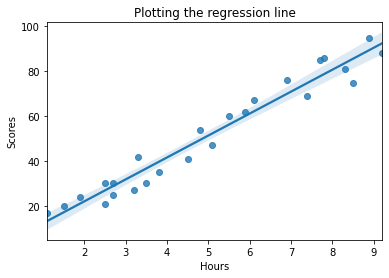

In [9]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.title("Plotting the regression line")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

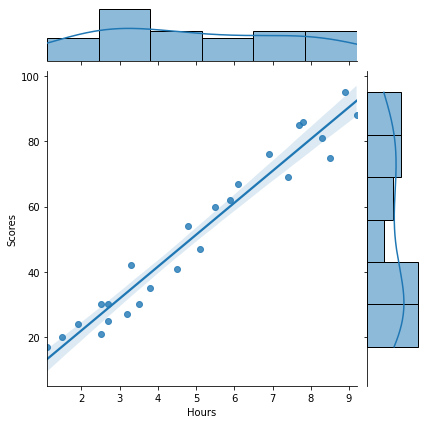

In [10]:
sns.jointplot(df['Hours'], df['Scores'], kind = "reg").annotate(stats.pearsonr)
plt.show()

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_prediction = regressor.predict(X_test)

In [14]:
y_prediction

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [15]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86])

In [16]:
y1_pred=y_prediction.astype(int)
y1_pred

array([17, 33, 74, 26, 60, 39, 20, 78])

In [17]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted_Score': y_prediction})  
df1

,Actual,Predicted_Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [18]:
print('accuracy score: %.2f' % regressor.score(X_test, y_test))

accuracy score: 0.96


In [19]:
print('intercept:', regressor.intercept_)

print('slope:', regressor.coef_)

intercept: 2.3708153823418883
slope: [9.78856669]


In [20]:
df1.columns

Index(['Actual', 'Predicted_Score'], dtype='object')

In [ ]:
df1.dtypes

In [21]:
cut_off = 40
cond=[(df['Scores']>= cut_off),
      (df['Scores']< cut_off)]
val=["Pass","Fail"]
df['Result']=np.select(cond,val)
df

,Hours,Scores,Result
0,2.5,21,Fail
1,5.1,47,Pass
2,3.2,27,Fail
3,8.5,75,Pass
4,3.5,30,Fail
5,1.5,20,Fail
6,9.2,88,Pass
7,5.5,60,Pass
8,8.3,81,Pass
9,2.7,25,Fail
